In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tpot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = [6, 4.0]

In [3]:
file = pd.read_csv('CLAMPING dataFrame3.csv',delimiter = ',', header = None)

##### A primeira linha está com o indice, então vamos remove-la

In [4]:
file = file.drop(file.index[0])

In [5]:
file

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
1,2.05,-2.95,6.05,29.25,40.85,54.65,69.05,65.65,49.05,36.65,...,17.25,15.65,17.85,17.25,12.45,-3.15,-15.35,1.18,108.91,127.11
2,20.37,11.17,17.97,28.97,27.17,36.37,53.17,48.97,30.17,30.57,...,21.17,2.97,-5.03,-8.63,-9.23,-10.43,-4.23,1.18,107.44,122.03
3,-12.74,-6.54,5.26,16.66,19.66,25.06,33.26,30.86,24.46,30.26,...,4.46,10.46,19.46,25.46,29.26,22.66,14.86,1.18,91.52,86.52
4,10.89,5.29,11.49,23.69,31.69,36.49,34.29,20.89,2.29,-6.51,...,8.49,8.89,13.09,15.89,15.89,11.29,0.89,1.18,98.56,73.56
5,4.52,-2.68,-0.28,12.52,16.72,20.52,25.52,19.92,10.32,4.92,...,8.92,-7.48,-13.28,-17.68,-30.88,-41.08,-38.08,1.18,106.19,80.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,18.14,8.14,25.34,41.14,45.74,59.94,67.54,46.14,22.94,17.74,...,58.74,40.74,33.94,35.94,35.54,29.14,20.94,6.39,1475.29,12877.29
5997,39.55,40.35,44.55,52.35,57.55,62.55,64.35,52.35,34.35,25.35,...,57.35,54.15,48.55,40.75,32.35,12.35,-3.25,6.39,1423.30,9523.30
5998,10.43,4.83,17.03,37.83,45.63,57.23,73.83,72.43,61.63,55.43,...,44.63,35.83,33.83,26.03,13.03,2.23,3.63,6.39,889.98,6406.98
5999,30.87,27.67,38.47,58.07,62.07,62.47,66.67,55.27,33.47,22.27,...,58.87,35.67,19.67,9.07,1.67,-6.33,-11.93,6.39,942.01,9289.01


#### Neste DataFrame, temos a banda da emissão espontanea (cada linha é um espectro) durante as 220 primeiras colunas
#### A coluna 220 são as energias, a coluna 221 são as intensidades do pump532 e a coluna 222 são as intensidades do RL

In [6]:
#arquivo com a média dos espectros

file_aux = file
df_media_movel = file_aux.rolling(window=200).mean()

file_aux = df_media_movel.iloc[199::200]

file_aux

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
200,-6.99710,-13.56610,-9.22710,5.07090,13.61490,21.54190,28.54690,23.22690,9.07390,3.91290,...,27.01090,16.11690,13.23390,10.49390,6.44090,-0.27610,-4.13910,1.18,108.55955,91.62345
400,-3.42685,-9.35385,-3.95885,10.10515,17.47615,23.85715,29.16815,21.96415,6.74815,1.50815,...,26.70115,17.09715,15.54415,12.87615,8.72715,2.19515,-2.21185,1.23,105.58640,87.22140
600,-3.74495,-9.86795,-4.24695,10.24405,18.29205,25.58105,31.90605,25.26905,10.04205,4.26005,...,27.82605,18.17805,16.89105,14.46005,10.13805,3.20205,-1.76695,1.50,98.55650,104.94850
800,-4.26335,-11.03435,-6.02235,8.75765,17.36665,24.59865,30.22765,23.75265,9.03965,3.58465,...,26.25665,15.72065,13.46165,10.81165,6.88665,-0.27835,-4.96035,1.56,145.29965,107.94865
1000,-3.56405,-9.70605,-4.33605,10.45195,19.05195,26.29295,31.75795,24.90095,9.77495,4.03795,...,27.79895,17.05095,14.96895,11.85395,7.14695,0.04195,-4.51605,1.74,186.86595,126.53095
1200,-5.32520,-11.09920,-5.09520,10.64280,20.82880,29.55080,35.33980,27.86180,11.57880,4.84580,...,29.68080,18.81980,16.19880,13.36680,8.84380,1.88980,-2.50220,1.88,169.86280,126.77680
1400,0.23050,-5.92650,-0.95950,13.65450,21.73450,28.35750,34.09450,27.71950,12.14950,5.89150,...,31.27950,20.70550,17.73550,13.92350,9.47150,2.91950,-0.89250,2.07,238.89025,142.11115
1600,0.25990,-5.67610,-0.46210,13.86890,22.46790,29.96690,35.18190,27.47490,11.56990,4.83390,...,33.46090,22.39990,19.40290,15.64290,10.28790,2.86590,-1.57510,2.20,237.43495,144.43195
1800,0.47915,-5.95085,-1.18985,13.31615,21.79815,29.28915,35.71815,29.47015,14.21315,8.39915,...,35.03515,25.18015,23.21015,19.98815,14.83715,7.41715,2.32115,2.52,323.16950,174.20050
2000,-2.53290,-9.36690,-3.82990,11.74610,20.84810,28.68310,35.20810,28.79710,13.45010,7.81910,...,33.06510,23.03410,20.81910,17.74210,13.13010,6.22310,1.70310,2.63,356.17640,172.24640


##### RODE A PROXIMA CÉLULA PARA TRABALHAR COM OS ESPECTROS MÉDIOS, AO INVÉS DE TODOS

In [7]:
#file = file_aux

In [8]:
#localiza o RL - alvo

RL = file.iloc[:,file.shape[1]-1]
PUMP = file.iloc[:,file.shape[1]-2]
ENERGY = file.iloc[:,file.shape[1]-3]

#### Agora vamos definir como variaveis preditoras, todos os outros valores que não é RL

In [9]:
X = file.drop(file.shape[1]-1, axis=1).values

In [11]:
#alvo

y = RL.values.reshape((-1,1))
y

array([[ 127.11],
       [ 122.03],
       [  86.52],
       ...,
       [6406.98],
       [9289.01],
       [7837.22]])

In [12]:
#esses dois arrays devem possuir o mesmo numero de linhas

X.shape, y.shape

((6000, 222), (6000, 1))

##### Separar os dados em Treino e Teste

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.85, random_state=2)

##### MODELO

In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.neural_network import MLPRegressor


# Average CV score on the training set was: -269233.38390724646
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=True, max_features=0.8500000000000001, min_samples_leaf=12, min_samples_split=18, n_estimators=100)),
    KNeighborsRegressor(n_neighbors=65, p=1, weights="distance") #n_neighbors=57

)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 7)

exported_pipeline.fit(X_train, y_train)
#results = exported_pipeline.predict(testing_features)


Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=True,
                                                                 max_features=0.8500000000000001,
                                                                 min_samples_leaf=12,
                                                                 min_samples_split=18,
                                                                 random_state=7))),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=65, p=1, weights='distance'))])

In [15]:
# all points
results = exported_pipeline.predict(X)

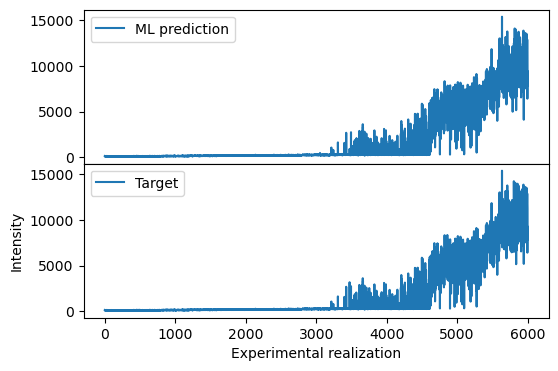

In [17]:
#quando for com o espectro médio, usar os hashtags

plt.subplots_adjust(hspace=0.0)
plt.subplot(2,1,1)
#plt.plot(ENERGY,results, label='ML predict', linewidth=2)
plt.plot(results, label='ML prediction')
plt.xticks([]) 
plt.legend()
plt.subplot(2,1,2)
#plt.plot(ENERGY,y, label='Target', linewidth=2)
plt.plot(y, label='Target')
#plt.xlabel('Energy pump (mJ)')
plt.xlabel('Experimental realization')
plt.ylabel('Intensity')
plt.legend()
plt.show()

In [18]:
y_aux = list(y.ravel())

In [19]:
y_aux2 = list(results.ravel())

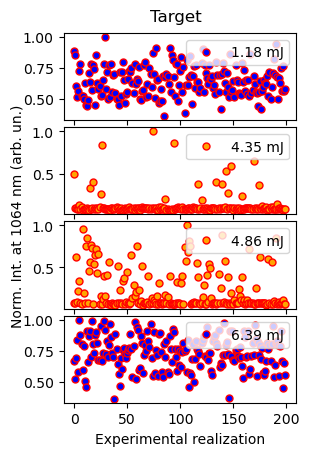

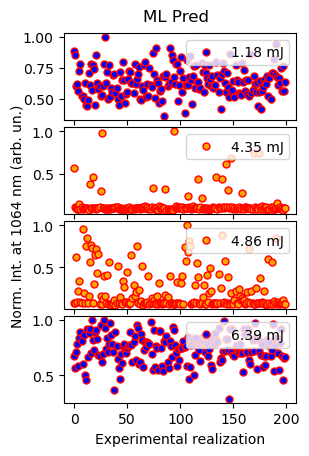

In [20]:
def func(func,titulo):

    num_energ = [0,17,21,29]

    RL_part1 = func[200*num_energ[0]:200 + num_energ[0]*200]
    RL_part2 = func[200*num_energ[1]:200 + num_energ[1]*200]
    RL_part3 = func[200*num_energ[2]:200 + num_energ[2]*200]
    RL_part4 = func[200*num_energ[3]:200 + num_energ[3]*200]

    fig, axs = plt.subplots(4, sharex=True, figsize=(3,4.8))
    plt.xlabel('Experimental realization')
    fig.text(-0.03, 0.5, 'Norm. Int. at 1064 nm (arb. un.)', ha='center', va='center', rotation='vertical')

    axs[0].plot(range(len(RL_part1)), RL_part1/max(RL_part1), 'o', markersize=5, mec='r', mew=1, zorder=1,c='b', label='1.18 mJ')
    axs[0].legend(loc='upper right')
    axs[1].plot(range(len(RL_part2)), RL_part2/max(RL_part2), 'o', markersize=5, mec='r', mew=1, zorder=1,c='orange', label='4.35 mJ')
    axs[1].legend(loc='upper right')
    axs[2].plot(range(len(RL_part3)), RL_part3/max(RL_part3), 'o', markersize=5, mec='r', mew=1, zorder=1,c='orange', label='4.86 mJ')
    axs[2].legend(loc='upper right')
    axs[3].plot(range(len(RL_part4)), RL_part4/max(RL_part4), 'o', markersize=5, mec='r', mew=1, zorder=1,c='b', label='6.39 mJ')
    axs[3].legend(loc='upper right')

    titulo=titulo
    fig.suptitle(f'{titulo}', y=0.93, fontsize=12)

    plt.subplots_adjust(hspace=0.08)

    
func(y_aux, 'Target')
func(y_aux2, 'ML Pred')

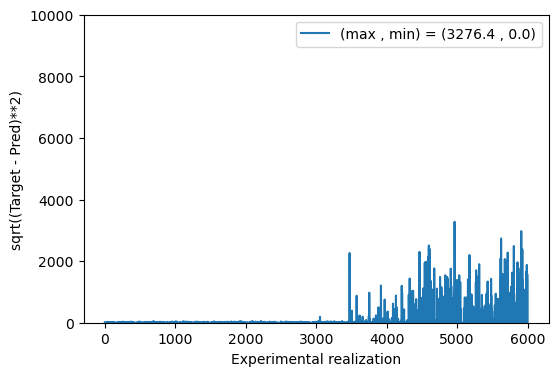

In [21]:
ma = float(np.round(max(np.abs(y-results)),2))
mi = float(np.round(min(np.abs(y-results)),2))

plt.plot(np.sqrt((y-results)**2), label=f'(max , min) = ({ma} , {mi})')
plt.xlabel('Experimental realization')
plt.ylabel('sqrt((Target - Pred)**2)')
plt.ylim(0,10000)
plt.legend()
plt.show()

In [22]:
# Results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import make_scorer
MAE = mean_absolute_error(y, results)
RMSE = np.sqrt(mean_squared_error(y, results))
R2  = r2_score(y, results)

print('MAE: ', MAE)
print('RMSE: ', RMSE)
print('R2 : ', R2)

MAE:  38.305647013499765
RMSE:  217.15045287009096
R2 :  0.9951429870105444


##### TEST SET

In [23]:
# TPOT Predict
y_pred = exported_pipeline.predict(X_test)

In [24]:
# Results
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import make_scorer
MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2  = r2_score(y_test, y_pred)

print('MAE: ', MAE)
print('RMSE: ', RMSE)
print('R2 : ', R2)

MAE:  255.37098008999845
RMSE:  560.6800583915073
R2 :  0.972006316448684


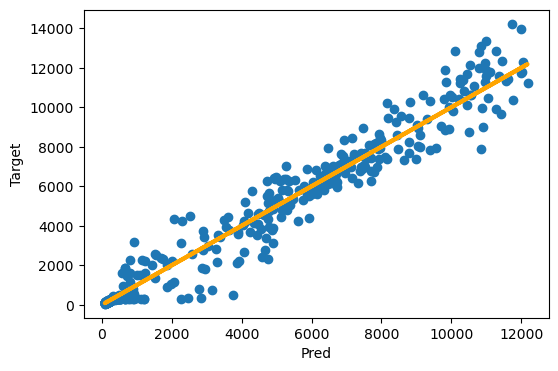

In [26]:
fig, ax = plt.subplots()
ax.scatter(y_pred,y_test)
ax.plot(y_pred,y_pred, color='orange', linewidth=3)
ax.set_ylabel('Target')
ax.set_xlabel('Pred')

# Adiciona o gráfico de dispersão e a linha de referência no inset
ax2.scatter(y_pred,y_test)
ax2.plot(y_pred,y_pred, color='orange', linewidth=3)
ax2.set_xlim(0,400)
ax2.set_ylim(0,400)

plt.show()